In [2]:
import pandas as pd
import statsmodels.api as sm
file=pd.read_csv("C:/Users/deepika sakthivel/Downloads/TakeHomeAssignmentonKNN/3 Take-Home Assignment/glass.csv")
df=pd.DataFrame(file)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.shape

(214, 10)

### Q1. Check for outliears and remove if any ?

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


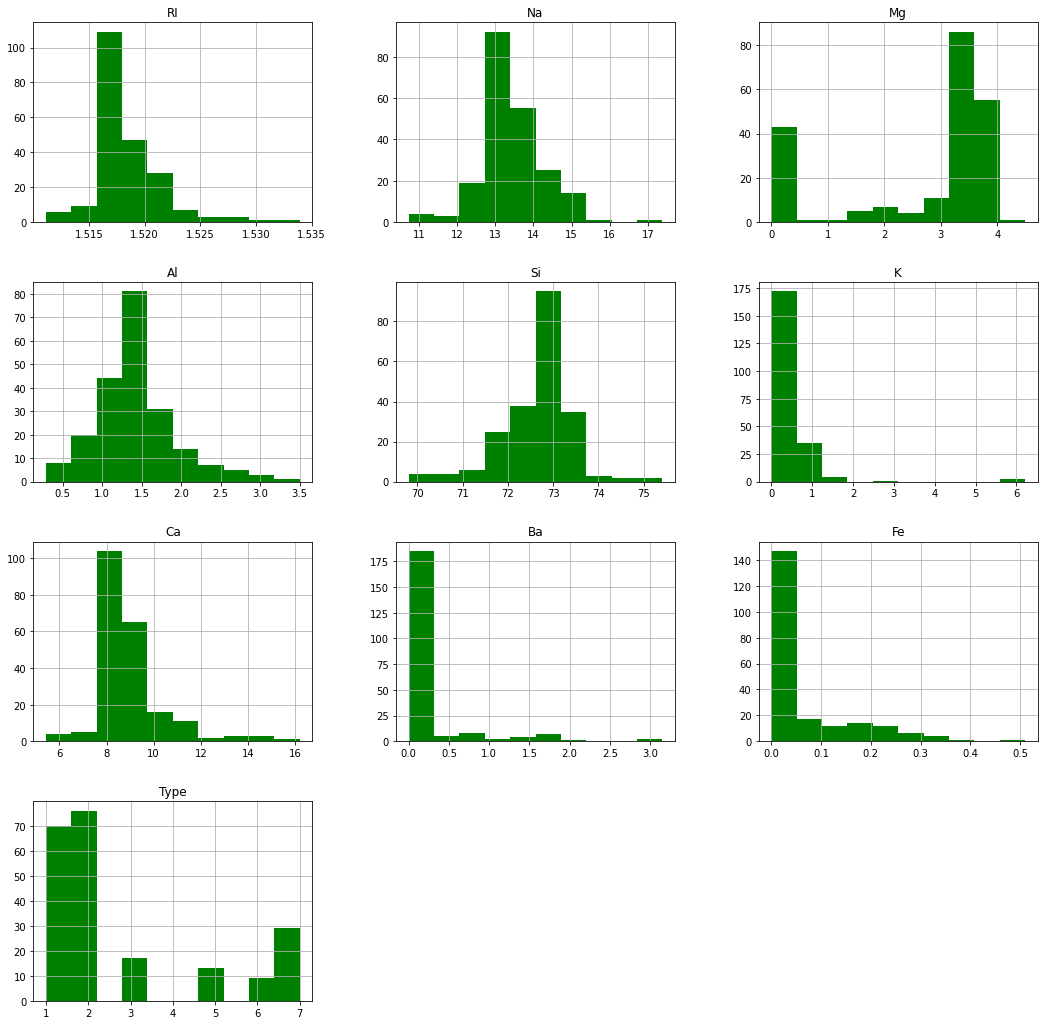

In [5]:
a=df.hist(figsize=(18,18),color='green')

Through above histograms we can conclude that there are outliers fe,Ca,K

In [10]:
d=df.copy()

In [11]:
d['Fe'].describe()


count    214.000000
mean       0.057009
std        0.097439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.510000
Name: Fe, dtype: float64

In [12]:
q=d['Fe'].quantile(0.98)
q

0.31740000000000007

In [13]:
data=d[d['Fe']<q]

In [14]:
d['Ca'].describe()

count    214.000000
mean       8.956963
std        1.423153
min        5.430000
25%        8.240000
50%        8.600000
75%        9.172500
max       16.190000
Name: Ca, dtype: float64

In [15]:
q=d['Ca'].quantile(0.98)
q

13.4036

In [16]:
data=d[d['Ca']<q]

In [17]:
d['K'].describe()

count    214.000000
mean       0.497056
std        0.652192
min        0.000000
25%        0.122500
50%        0.555000
75%        0.610000
max        6.210000
Name: K, dtype: float64

In [18]:
q=d['K'].quantile(0.98)
q

1.622800000000002

In [19]:
data=d[d['K']<q]

In [20]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.518473,13.414402,2.720622,1.419378,72.671005,0.420144,9.007990,0.163014,0.058373,2.708134
std,0.002978,0.817901,1.422682,0.457372,0.710957,0.279434,1.388124,0.477406,0.098196,2.069927
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.790000,0.000000,0.000000,1.000000
25%,1.516580,12.900000,2.200000,1.190000,72.320000,0.120000,8.270000,0.000000,0.000000,1.000000
50%,1.517690,13.300000,3.480000,1.360000,72.790000,0.550000,8.610000,0.000000,0.000000,2.000000
75%,1.519180,13.830000,3.610000,1.620000,73.090000,0.600000,9.230000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,2.880000,75.410000,1.460000,16.190000,3.150000,0.510000,7.000000


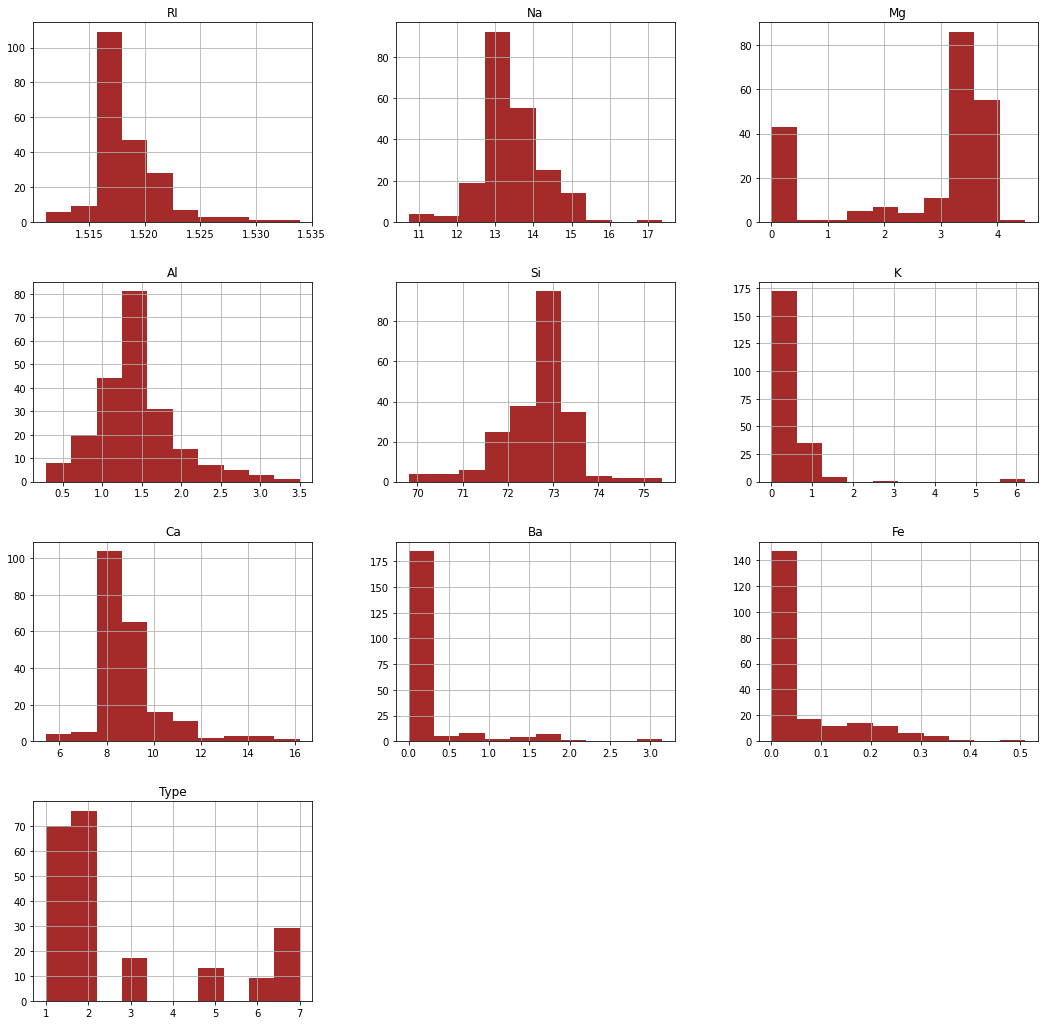

In [6]:
data=df.hist(figsize=(18,18),color='brown')

### Q2. Check if any features are related to each other ?

In [22]:
# check correlation
num = d.drop('Type', axis=1)
corr =num.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


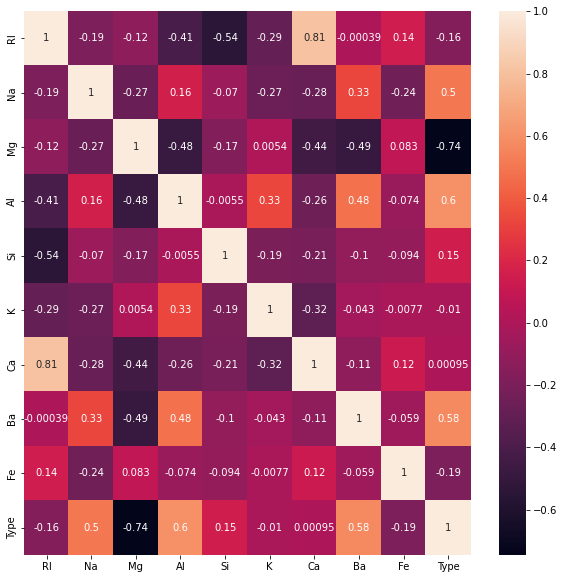

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(),annot=True)

### Q3. Find the optimal value of 'k' in KNN ?

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = d.drop(['Type'],axis = 1)
y = d['Type']


In [27]:
scaler.fit(x)

MinMaxScaler()

In [29]:
X = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [32]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [33]:
knn_gscv.best_score_

0.6729411764705883

### Q4. Calculate the mean performance of the model ?

In [34]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = KNeighborsClassifier(2)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X_train, y_train, r)
    results.append(mean(scores))

print("Mean score = ",mean(results))

Mean score =  0.6608497248333849


### Q5. Perform Feature selection and build a KNN Classifier by considering optimal value of k?

In [35]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X_new = SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)

In [36]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_new,y,test_size = 0.2 , random_state = 42)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [38]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [39]:
knn_gscv.best_score_

0.7020168067226892

In [40]:
scaler = MinMaxScaler()

In [42]:
x = d.drop(['Type'],axis = 1)
y = d['Type']

In [43]:
scaler.fit(x)

MinMaxScaler()

In [44]:
X = scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [47]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [48]:
knn_gscv.best_score_

0.6729411764705883